# Learning from Data: Workshop 2

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|22nd January 2015  | **12:00 Thursday 11th February 2015** |


This workshop is worth 8% of the total module mark.


Note that both paper (BART) and electronic submissions are required.  Submit a paper copy of your notebook to the Student Services Office and an electronic copy via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/).


Candidate number: ** ######## **  




Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the reports
You should convert your notebook to printable form, either by downloading it as LaTeX and thence PDF or by printing it directly (see the File menu).  If you use colour make sure that you print in colour or the figures can be easily understood in black and white.

Reports should be handed-in to the Student Services Office with the BART coversheet.  You should also submit the notebook electronically at  <http://empslocal.ex.ac.uk/submit/>.  You just need to submit the single file that is the notebook, so you should be able to upload it directly from the directory on the Blue Room machine.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.


> Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 

In [1]:
%pylab inline
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


## Classification with k-nearest neighbours

In this section of the workshop you will use a k-nearest neighbours classifier to first classify some two-dimensional data that can be easily plotted.  After that we'll try it on a more complicated dataset.

First download and plot some data

In [2]:
import wget

try: 
    X = loadtxt('raw-tremor.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/raw-tremor.txt')
    X = loadtxt('raw-tremor.txt')
print(X.shape)

(357, 3)


In [3]:
t = X[:,2]
X = X[:,:2]
print(t.shape, X.shape)
#print(t) #t creates an array with ones and zeros, allows us to see who is a patient and who is normal
#print(X) #is an array of the corresponding values 

(357,) (357, 2)


Plot the data according to the labels

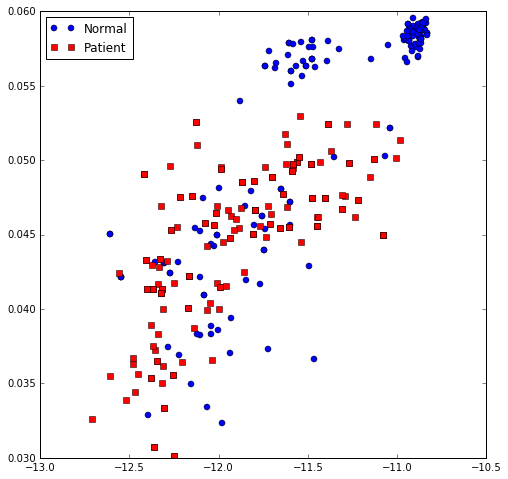

In [4]:
normal = t == 1 #matrix of True and False Values, True values the poeple in the control group
patient = t == 0
plot(X[normal,0], X[normal,1], 'bo', label='Normal') #this plots a table of all the control group (healthy people)
plot(X[patient,0], X[patient,1], 'rs', label='Patient') #this plots the table of all of the patiets 
legend(loc=2)

This data is a scaled version of the tremor data. Plot it and note the disparity in the sizes of the data.

### Mean and standard deviation

Find the mean (centroid) and standard deviation of the features as a whole and also for each of the classes. Check that the mean and standard
  deviation make sense in terms of your scatter plot.  You could plot the location of the centroid on the scatter plot.

Data mean [-11.62216853   0.04892984]
Data standard deviation [ 0.54510484  0.00777128]
Mean and standard deviation of standardised data [  7.15145341e-15   4.43233996e-15] [ 1.  1.]


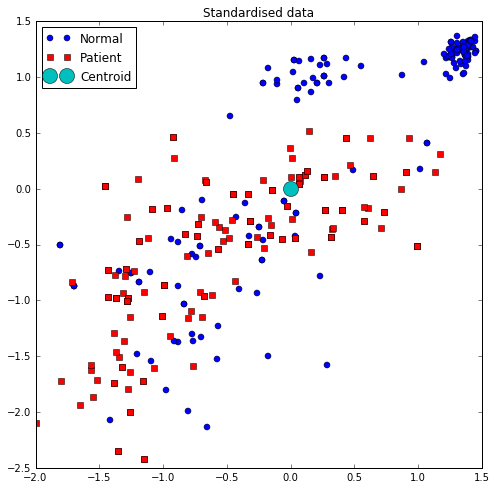

In [5]:
xbar = mean(X, axis=0)
xbarnormal = mean(X[normal,:], axis=0)  
xbarpatient = mean(X[patient,:], axis=0)
xstd = std(X, axis=0) #finds the standard deviation of all the results 

xstdnormal = std(X[normal,:], axis=0) #standard deviations of the normal people 
xstdpatient = std(X[patient,:], axis=0) #standard deviations of the patients 

Xstd = (X-xbar)/xstd #mean centering the data

plot(Xstd[normal,0], Xstd[normal,1], 'bo', label='Normal') #plots the mean centred data
plot(Xstd[patient,0], Xstd[patient,1], 'rs', label='Patient') #plots the mean centred data
plot(mean(Xstd, axis=0)[0], mean(Xstd, axis=0)[1], 'co', ms=15, label='Centroid') # plots the centroid
legend(loc=2)
title('Standardised data')

print('Data mean', xbar)
print('Data standard deviation', xstd)
print('Mean and standard deviation of standardised data', mean(Xstd, axis=0), std(Xstd, axis=0))

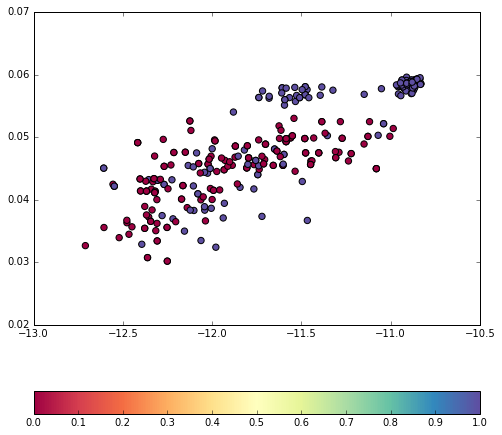

In [6]:
# An alternative way of plotting that colours the markers according to the value of t
scatter(X[:,0], X[:,1], s=40, c=t, cmap=cm.Spectral)
colorbar(orientation='horizontal')

Make sure you understand the way the above works.  Print the values of the variables is you're not sure and use help etc to find out about plot and scatter.

### Covariance 

Use the Python command <code>cov</code> to return the covariance matrix.  Check that the diagonal entries are what you expect from the standard deviations.

In [7]:
cov(X[:, 0], X[:, 1]) #or you can do the transpose cov(X.T)

print(diag(cov(X.T)))
print(var(X, axis=0, ddof=1))
assert allclose(diag(cov(X.T, ddof=1)), var(X, axis=0, ddof=1))

[  2.97973950e-01   6.05623797e-05]
[  2.97973950e-01   6.05623797e-05]


Write a loop to calculate the covariance matrix by hand:
\begin{align*}
   S_{ij} = \frac{1}{N-1}\sum_{n=1}^N (x_{ni} - \bar{x}_{i})(x_{nj} - \bar{x}_{j})
\end{align*}
for each $i$ and $j$.

Check that you get the same result using both methods.

In [8]:
empty_matrix = empty((2,2))

for i in X: 
    empty_matrix[0][0] += (i[0] - xbar[0]) * (i[0] - xbar[0]) #covarience between x and x
    empty_matrix[0][1] += (i[0] - xbar[0]) * (i[1] - xbar[1]) #covarience between x and y
    empty_matrix[1][0] += (i[0] - xbar[0]) * (i[1] - xbar[1]) #covarience between y and x
    empty_matrix[1][1] += (i[1] - xbar[1]) * (i[1] - xbar[1]) #covarience between y and y

cov_matrix = empty_matrix / len(X-1)

print(cov_matrix)
assert allclose(cov_matrix, cov(X.T))

[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


### Standardisation

Standardise the data by mean-centring it and dividing by the
standard deviation of the relevant variable. (You can use the commands
<code>mean</code> and <code>std</code> to find the mean and standard deviation.)
Plot the standardised data
and check your result by finding its mean and covariance matrix. 



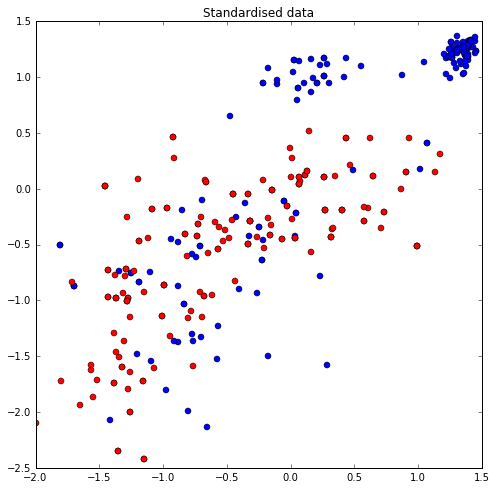

In [9]:
standardised = (X - xbar) / xstd #mean centred data
cov_standard = cov(standardised.T)

plot(standardised[normal, 0], standardised[normal, 1], 'bo', label=normal)
plot(standardised[patient, 0], standardised[patient, 1], 'ro', label=normal)
title('Standardised data')

Find the
correlation between the two variables $x_1$ and $x_2$ from the standardised
covariance matrix.  You can use  <code>corrcoef</code> to check your results, but you should be able to read it from the covariance matrix of the standardised data.

In [10]:
correlation1 = corrcoef(standardised[:, 0], standardised[:, 1]) #correlation of standardised data 
standard_dev = matrix(diag(sqrt(cov_standard))) #standard deviations of the standardised data
temp = standard_dev.T @ standard_dev #dividing the covariance by the product of standard deviations
correlation2 = cov_standard / temp

print("Correleation found using the numpy corrcoef fucntion: ", "\n", correlation2, '\n')
print("Correleation found using my method:", "\n", correlation1, "\n")

print("The results from the correleation function are the same as my method: ")
assert allclose(correlation1, correlation2)

Correleation found using the numpy corrcoef fucntion:  
 [[ 1.          0.84167659]
 [ 0.84167659  1.        ]] 

Correleation found using my method: 
 [[ 1.          0.84167659]
 [ 0.84167659  1.        ]] 

The results from the correleation function are the same as my method: 


## k-nearest neighbour classifier

Now use a k-nn classifier to classify the *raw* data.  You will have to divide the data into a training and a test set.  You can use the k-nn classifier from the <code>sklearn</code> module as follows.

In [11]:
# Divide the data into training and test sets
from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2:]

Xtr = X[Itr,:] #training values
ttr = t[Itr]

Xte = X[Ite,:] #testing values  
tte = t[Ite]

patient_training = ttr == 1 #Creating array of True and False values to pass through 
patient_testing = tte == 1

normal_training = ttr == 0
normal_testing = tte == 0

Plot your training and test sets to make sure that they look like a fair random division of the data.

The training data are to be used to construct the classifier. The test data, which should not be used a
t all during training, are used to evaluate how well the classifier works.

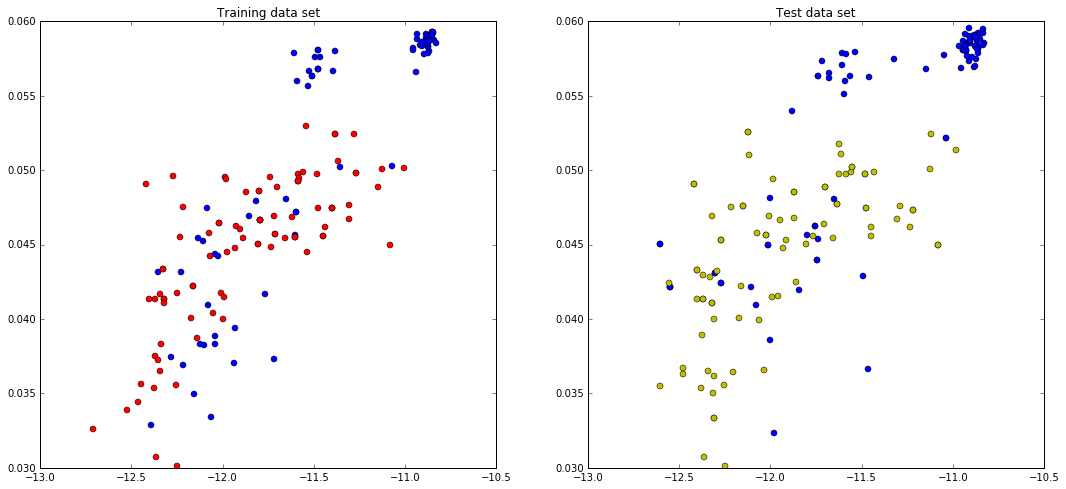

In [12]:
figure(figsize=(18, 8))

subplot(121)
plot(Xtr[patient_training,0], Xtr[patient_training,1], 'bo')
plot(Xtr[normal_training,0], Xtr[normal_training,1], 'ro')
title('Training data set')

subplot(122)
plot(Xte[patient_testing,0], Xte[patient_testing,1], 'bo') #plots the training data for
plot(Xte[normal_testing,0], Xte[normal_testing,1], 'yo')
title('Test data set')

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data
#print(list(y).count(1)) # the number of pople allocated to having the disease
#print(y) #array of 1's and 0's indicating the new classifications

Use your classifier to carry out $k=1$ classification of the
<code>Xte</code> tremor data. As you did for the previous question, plot the
training data according to its class and plot the test data according to
both its true class (from <code>tte</code>) and its predicted class from your
classifier.  Where the predicted class differs from the true class make
sure that you can see from the plot why the classifier has classified the
way it has. Work out the <i>classification accuracy</i> for your
classifier, that is the fraction of examples in <code>Xte</code> for which  the
classifier predicts the correct class.

Repeat the above for  $k = 3$ and $k = 10$ and give an explanation for
your results.   Automate the procedure to plot a graph of the
classification accuracy of <code>Xte</code> versus $k$ for $k$ up to about 40.  What's the best $k$ to use?  Why are smaller $k$ worse?  Why are larger $k$ worse?

Now plot the classification accuracy for the <i>training </i> data (that
is call your classifier like <code>knn.predict(Xtr)</code>).
Explain the shape of the curve.

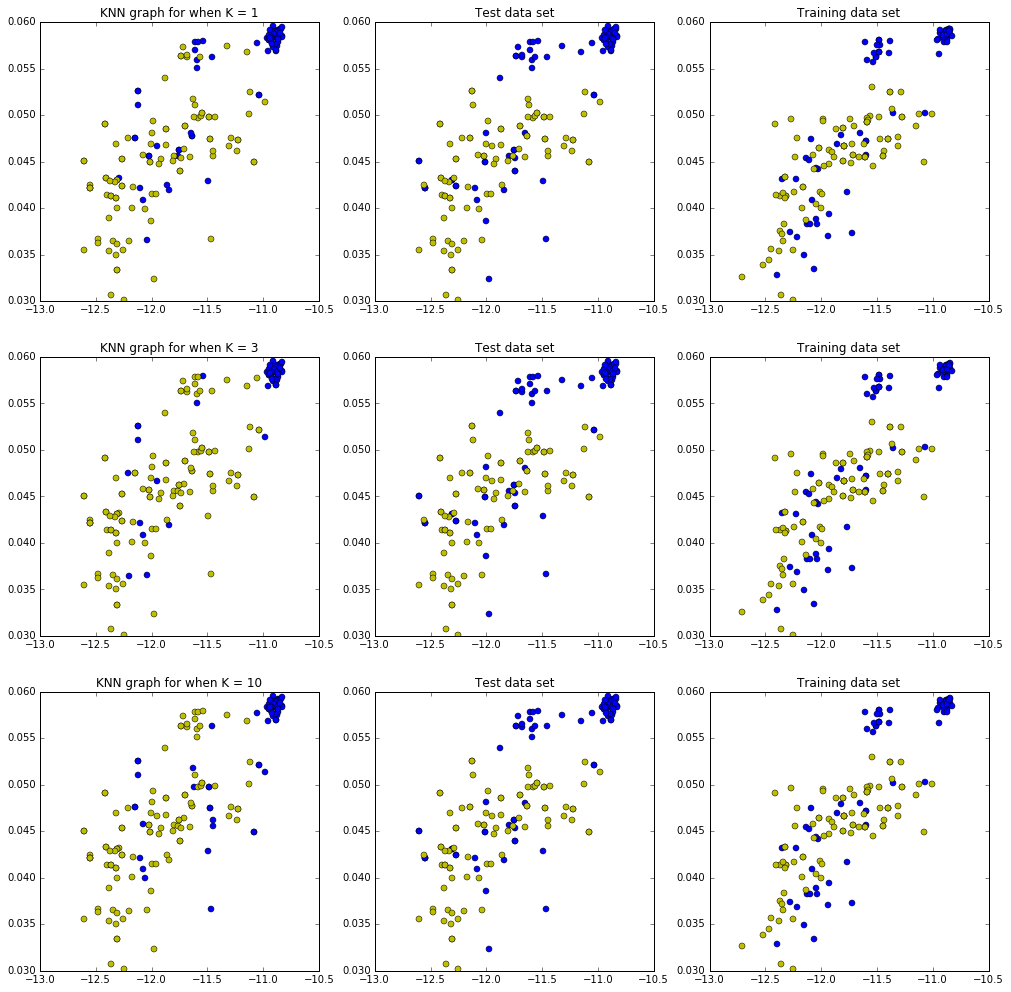

In [14]:
def knearest(K, tr_data, ts_data, tr_values, pt):
    
    """
    This function creates the KNN distribution for a given set of data and neighbours
    The function takes in the values K, tr_data, ts_data, tr_values
    """
    
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(tr_data, tr_values)   # Train it
    y = knn.predict(ts_data)
    tr_patient = y == 1
    tr_normal = y == 0
    
    if pt:
        plot(ts_data[tr_patient,0], ts_data[tr_patient,1], 'bo')
        plot(ts_data[tr_normal,0], ts_data[tr_normal,1], 'yo')
    else:
        return y

#----------------------------------------------------------------------------------------
    
figure(figsize=(17, 17))

#nearest neighbour of 1 graph
subplot(331)
title('KNN graph for when K = 1')
knearest(1, Xtr, Xte, ttr, pt=True)

subplot(332)
plot(Xte[patient_testing,0], Xte[patient_testing,1], 'bo') #plots the training data for
plot(Xte[normal_testing,0], Xte[normal_testing,1], 'yo')
title('Test data set')

subplot(333)
plot(Xtr[patient_training,0], Xtr[patient_training,1], 'bo')
plot(Xtr[normal_training,0], Xtr[normal_training,1], 'yo')
title('Training data set')

#----------------------------------------------------------------------------------------

#nearest neighbour of 3 graph
subplot(334)
title('KNN graph for when K = 3')
knearest(3, Xtr, Xte, ttr, pt=True)

subplot(335)
plot(Xte[patient_testing,0], Xte[patient_testing,1], 'bo') #plots the training data for
plot(Xte[normal_testing,0], Xte[normal_testing,1], 'yo')
title('Test data set')

subplot(336)
plot(Xtr[patient_training,0], Xtr[patient_training,1], 'bo')
plot(Xtr[normal_training,0], Xtr[normal_training,1], 'yo')
title('Training data set')

#----------------------------------------------------------------------------------------

#nearest neighbour of 10 graph
subplot(337)
title('KNN graph for when K = 10')
knearest(10, Xtr, Xte, ttr, pt=True)

subplot(338)
plot(Xte[patient_testing,0], Xte[patient_testing,1], 'bo') #plots the training data for
plot(Xte[normal_testing,0], Xte[normal_testing,1], 'yo')
title('Test data set')

subplot(339)
plot(Xtr[patient_training,0], Xtr[patient_training,1], 'bo')
plot(Xtr[normal_training,0], Xtr[normal_training,1], 'yo')
title('Training data set')

**Answer**

The best k to use in this case is k=1 here we have a classification accuracy of 80%, as we increase K (the amount of neighbors) the classification accuracy starts to decline. This is because the larger the k, greater amount of data points are taken into the model. For example if there is a cluster of yellow points near a few blue points as k increases the it becomes more and more likely that the few bule points will become misclassified as the model will take into account the cluster of yellow points.

The curve is downward sloping, as k rises the number of misclassifications rise and therefore accuracy of the predictions fall.

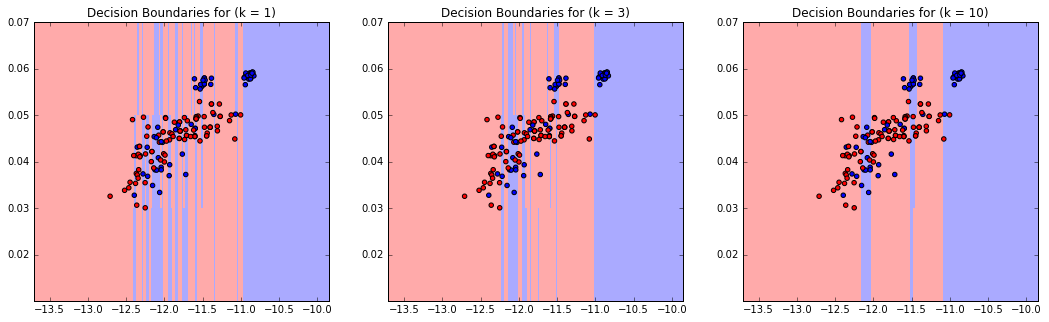

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def decisionBoundary(K, tr_data, tr_values):
    n_neighbors = K
    X = tr_data
    y = tr_values
    h = .02

    #color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    knn.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 0.02, X[:, 1].max() + 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())
    title("Decision Boundaries for (k = %i)"
                % (n_neighbors))

#-----------------------------------DECISION BOUNDARIES FOR NON-STANDARDISED DATA-------------------------    

figure(figsize=(18, 5))

subplot(131)
decisionBoundary(1, Xtr, ttr)

subplot(132)
decisionBoundary(3, Xtr, ttr)

subplot(133)
decisionBoundary(10, Xtr, ttr)

Classification accuracy when K = 1: 0.7653631284916201
Classification accuracy when K = 3: 0.7318435754189944
Classification accuracy when K = 10: 0.6927374301675978


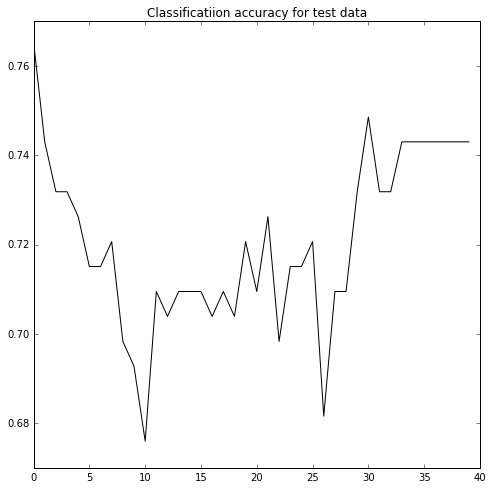

In [16]:
#Finding the accuracy 

def accuracy_rate(fitted, te_values):
    """
    This function takes in the fitted values and the test values
    it returns the accuracy rate.
    """   
    count = 0    
    for i in zip(fitted, te_values):
        if i[0] == i[1]:
            count += 1
    return count/len(fitted)

#Function for finding the accuracies for k

def accuracy_rate_for_k(K, tr_data, ts_data, tr_values, te_values, pt):
    """
    This function takes in K, the training data, test data, target values, test values 
    and pt which shows a plot. It a list of accuracy rates depending on K
    """
    X = []
    for i in range(K):
        X.append(accuracy_rate(knearest(i+1, tr_data, ts_data, tr_values, pt=False), te_values))
    return X
 
#-------------------------------------------------------------------------------------------------------
    
classification_accuracy = accuracy_rate_for_k(40, Xtr, Xte, ttr, tte, pt=False) #list of all the accuracy rates

print("Classification accuracy when K = 1:", classification_accuracy[0])
print("Classification accuracy when K = 3:", classification_accuracy[2])
print("Classification accuracy when K = 10:", classification_accuracy[9])

plot(classification_accuracy, 'k')
title('Classificatiion accuracy for test data')

Find the mean and standard deviations of the *training* data and use these to standardise the training data.  Use the training data mean and standard deviation to standardise the test data.  Note that it's important to use the training data statistics (rather than the test data statistics) because both data should be treated in *exactly* the same way and we might only have a single test data point to classify.

Plot your standardised data.

Training data means: [-11.61183939   0.04867041]
Training data standard deviations: [ 0.52106243  0.00781951]
Testing data means: [-11.63243997   0.04918782]
Testing data standard deviations: [ 0.56781839  0.00771437]


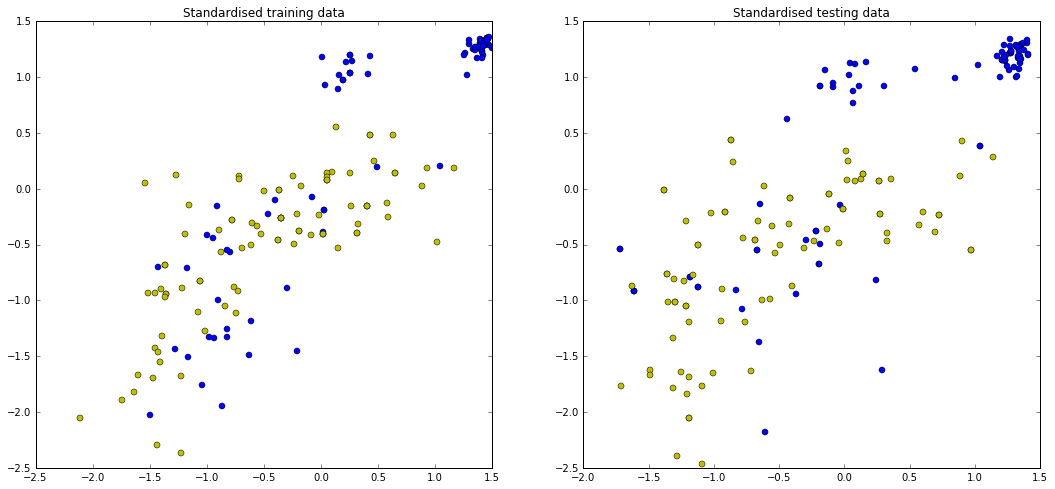

In [17]:
tr_mean = mean(Xtr, axis=0) #training mean
tr_std = std(Xtr, axis=0) #training standard deviation

print("Training data means: %s" % (tr_mean))
print("Training data standard deviations: %s" % (tr_std))

ts_mean = mean(Xte, axis=0) #test mean
ts_std = std(Xte, axis=0) # test standard deviation

print("Testing data means: %s" % (ts_mean))
print("Testing data standard deviations: %s" % (ts_std))

tr_standardised = (Xtr - tr_mean)/tr_std #training data standardised
ts_standardised = (Xte - ts_mean)/ts_std #test data standardised 

#---------------------------------PLOTS------------------------------------

figure(figsize=(18, 8))
subplot(121)
plot(tr_standardised[patient_training,0], tr_standardised[patient_training,1], 'bo') #plots the training data for
plot(tr_standardised[normal_training,0], tr_standardised[normal_training,1], 'yo')
title("Standardised training data")

subplot(122)
plot(ts_standardised[patient_testing,0], ts_standardised[patient_testing,1], 'bo') #plots the training data for
plot(ts_standardised[normal_testing,0], ts_standardised[normal_testing,1], 'yo')
title("Standardised testing data")

Now use the k-nn classifier to find the accuracy using the standardised data.  How does it compare with the raw data?

**Answer**
As you can see from the graph below the Stadardised data (blue line) has a much greater classification rate when compared to the raw data (red line). The Standardised data classification rate is significantly larger than the raw data this is because standardising the data mean centres the data partially eliminating the spread of the data. 

Standardised data classification accuracy for when K = 1:  0.7988826815642458
Standardised data classification accuracy for when K = 3:  0.7877094972067039
Standardised data classification accuracy for when K = 10:  0.8268156424581006


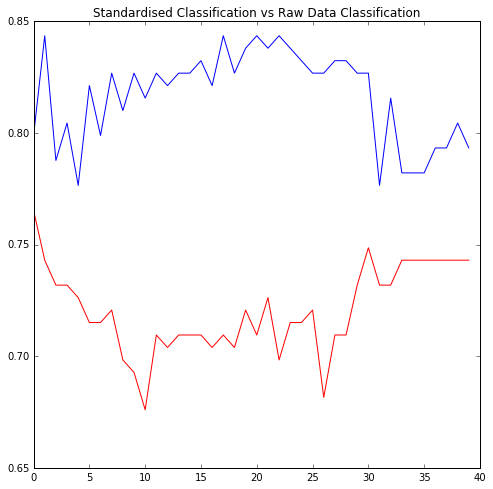

In [18]:
raw_data_classification = accuracy_rate_for_k(40, Xtr, Xte, ttr, tte, pt=False)
st_classifaction_rate = accuracy_rate_for_k(40, tr_standardised, ts_standardised, ttr, tte, pt=False)

plot(st_classifaction_rate, 'b')
plot(raw_data_classification, 'r')
title("Standardised Classification vs Raw Data Classification")

print("Standardised data classification accuracy for when K = 1: ", st_classifaction_rate[0])
print("Standardised data classification accuracy for when K = 3: ", st_classifaction_rate[2])
print("Standardised data classification accuracy for when K = 10: ", st_classifaction_rate[9])

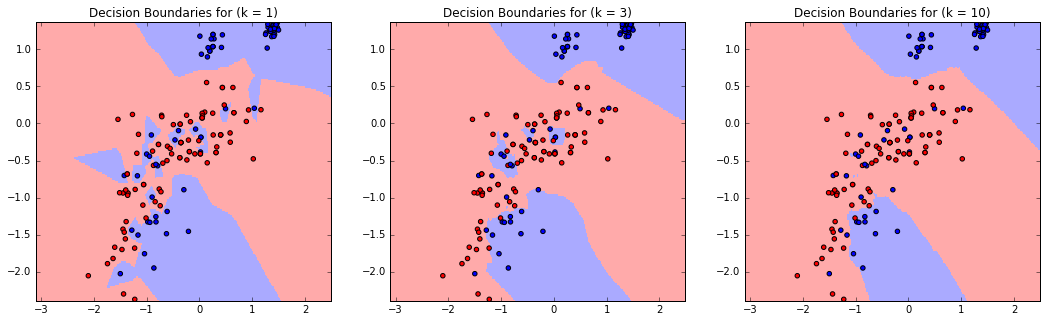

In [19]:
#------------------------------DECISION BOUNDARIES FOR STANDARDISED DATA-----------------------------------

#Standardised data has a better classification rate when compared to the raw data

figure(figsize=(18, 5))

subplot(131)
decisionBoundary(1, tr_standardised, ttr) # K = 1
subplot(132)
decisionBoundary(3, tr_standardised, ttr) # K = 3
subplot(133)
decisionBoundary(10, tr_standardised, ttr) # K = 10

# Sphering

Sphere  the tremor data and plot it in the sphered coordinates. Compute the mean and covariance matrix of the sphered data: are they what you expect?


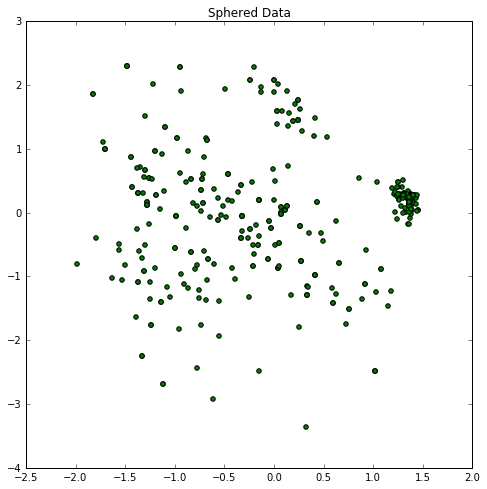

In [20]:
xbar_sphere = mean(X, axis=0)
Y_sphere = X - xbar_sphere

S = cov(Y_sphere[:, 0], Y_sphere[:, 1])

lmbda, U = eigh(S)
lmbda[lmbda < 0] = 0

W = U @ (diag(sqrt(lmbda)) @ U.T)
assert allclose((W @ W), S)
Winv = U @ (diag(1/sqrt(lmbda)) @ U.T)
H = Y_sphere @ Winv

sphered_mean = mean(H, axis=0)
sphered_covariance = cov(H.T)
covarience_check = diag(array([1, 1])) #an array whereby the leading diagonalis ones

scatter(H[:, 0], H[:, 1], c='g')
title('Sphered Data')

assert allclose(sphered_mean, 0) #The mean of the sphered data is zero, this is what I expect. with sphering the data
assert allclose(sphered_covariance, covarience_check) #The covariance is of the data is correct 1010

Find the classification accuracy using the sphered data.

Sphered data classification accuracy for when K = 1:  0.8547486033519553
Sphered data classification accuracy for when K = 3:  0.8491620111731844
Sphered data classification accuracy for when K = 10:  0.8156424581005587


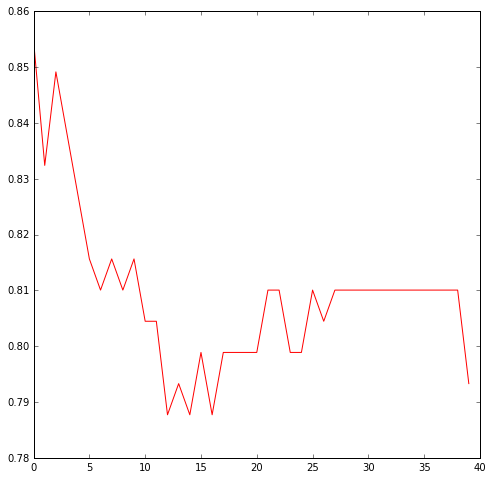

In [21]:
sph_tr = H[Itr,:]
sph_te = H[Ite,:]

sph_classifaction_rates = accuracy_rate_for_k(40, sph_tr, sph_te, ttr, tte, pt=False) #CHANGE THIS BACK TO K=40

print("Sphered data classification accuracy for when K = 1: ", sph_classifaction_rates[0])
print("Sphered data classification accuracy for when K = 3: ", sph_classifaction_rates[2])
print("Sphered data classification accuracy for when K = 10: ", sph_classifaction_rates[9])

plot(sph_classifaction_rates, 'r')

## Classifying digits

Here you'll use the k-nn classifier to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

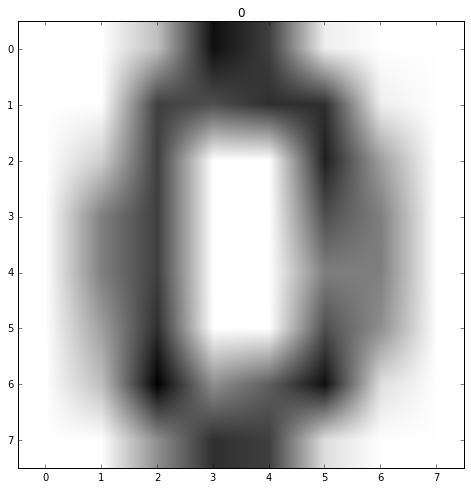

In [22]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0]) #this selects a random gigit from the the 1797 possible choices 
# print(digits.data[j]) prints the array of the of digits 
imshow(reshape(digits.data[j],(8,8)), cmap=cm.gray_r) #changes the shape of the array to 8x8
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [23]:
mydigits = [3, 2]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]# Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i
    

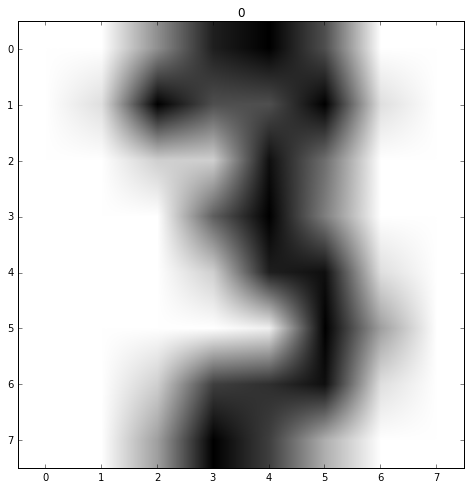

In [24]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

### k-nn classification

Now use your k-nn classifier to classify the image vectors.  What is the accuracy?   Note that here you should (a) split your data into training and testing data and (b) use cross validation on the training data to determine the best value of $k$ before finding the accuracy on the test data.  One reasonable way of proceeding would be to split the data into equal-sized training and test sets and then use 5 or 10 fold cross validation on the training set to determine $k$.

Do the misclassified images look like the other class?

(360,)
Digits data classification accuracy for when K = 1:  1.0
Digits data classification accuracy for when K = 3:  1.0
Digits data classification accuracy for when K = 10:  1.0


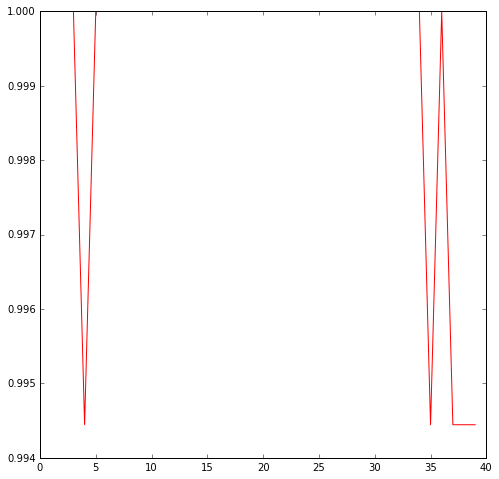

In [25]:
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
digits_Itr = I[:N//2]
digits_Ite = I[N//2:]

print(t.shape)

digits_Xtr = X[digits_Itr,:] #training values
digits_ttr = t[digits_Itr]


digits_Xte = X[digits_Ite,:] #testing values  
digits_tte = t[digits_Ite]

digits_training = digits_ttr == 1 #Creating array of True and False values to pass through 
digits_testing = digits_tte == 1

digits_training = digits_ttr == 0
digits_testing = digits_tte == 0

digits_accuracy = accuracy_rate_for_k(40, digits_Xtr, digits_Xte, digits_ttr, digits_tte, pt=False)

print("Digits data classification accuracy for when K = 1: ", digits_accuracy[0])
print("Digits data classification accuracy for when K = 3: ", digits_accuracy[2])
print("Digits data classification accuracy for when K = 10: ", digits_accuracy[9])

plot(digits_accuracy, 'r')

In [26]:
#-------------------------CROSS VALIDATION 5 FOLD--------------------------------------

def crossValidation(data, folds, t, k):
    
    """
    This function splits the data into equal parts and preforms cross validation
    It takes in the parameters, data (array), the number of folds e.g 5 fold, t
    and the amount of neighbors K.
    
    The function returns the average of the classification accuracies.
    """
    
    iterator = permutation(len(data))
    iterator = split(iterator, folds)
    T = split(t, folds)
    Z = []
    
    for i in range(folds):
        Itr = array(iterator[i])
        ttr = t[Itr]
        Xtr = data[Itr, :]
        #print(Itr.shape)
        
        Ite = delete(iterator, i, 0)
        Ite = concatenate(Ite)
        tte = t[Ite]
        Xte = data[Ite, :]
        #print(Ite.shape)
        
        Z.append(accuracy_rate_for_k(k, Xtr, Xte, ttr, tte, pt=False))
        
    return average(Z)

#-------------------------REPEATING 40 TIMES TAKING AV------------------------------------------
accuracies_crossValidation = []

for i in range(40):
    accuracies_crossValidation.append((crossValidation(X, 5, t, i+1)))

#print(accuracies_crossValidation)

print("Classification accuracy for when K = 1: ", accuracies_crossValidation[0])
print("I would use K = 1 as it provides the largest accuracy compared to the others")

Classification accuracy for when K = 1:  0.994444444444
I would use K = 1 as it provides the largest accuracy compared to the others


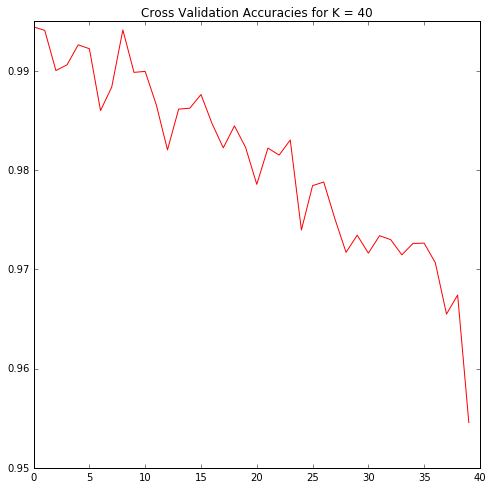

In [27]:
plot(accuracies_crossValidation, 'r')
title("Cross Validation Accuracies for K = 40")

In [28]:
#finding the values tghe misclassified images, here we have to find the targets of the misclassified images
#Once we find the targets we can locate the values by passing the targets though the data array XTE
#We can then use the imshow fuction to show the images 

#Regarding the results of the misclassification, I would have expected numbers such as 8 and 6
# to be misclassified because they look similar

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(digits_Xtr, ttr)   # Train it

y = knn1.predict(digits_Xte)

digits_tte != y # this will give me the targest of the misclassified images however I dont know what went wrong 😕


ValueError: Found arrays with inconsistent numbers of samples: [178 180]